<h1 style="text-align: center;">TP2 - Desenvolvimento de Serviços Web e Testes com Java</h1>

| ![Logo Infnet](https://mir-s3-cdn-cf.behance.net/projects/404/9115f025917929.5547cdc9cda40.jpg) |
|:-------------------------------------------------------------------------:|


<h5 style="text-align: center;">Professor: Rinaldo Ferreira Junior || Estudante: Paulo Henrique de Paula Dias</h5>

<h5 style="text-align: center;">Data limite: 19/05/2025</h5>

##### Links úteis:

Repositório Git Hub - [Link](https://github.com/PAULOHENRIQUEDEPAULADIAS/Paulo_Dias_DNCS_TP2)

### Ponto de Partida

Neste segundo Teste de Performance (TP2), você será desafiado a aplicar conceitos fundamentais para o desenvolvimento de aplicações interativas com ASP.NET Core Razor Pages, focando em model binding, validação de dados, roteamento e trabalhos com arquivos.

A partir de exemplos práticos inspirados no material didático e em aplicações reais de mercado, você irá desenvolver funcionalidades típicas de sistemas web com formulários, organização de URLs, controle de entrada do usuário e manipulação de arquivos.

### Exercício 1 - Criando uma Razor Page com PageModel e Propriedade Vinculada

Imagine uma aplicação interna para cadastro de cidades turísticas. Crie uma Razor Page chamada CreateCity.cshtml com um PageModel que contenha uma propriedade pública CityName, vinculada por model binding com [BindProperty].

Tarefas:

* Crie o arquivo Razor Page em uma pasta Pages/CityManager.
* Implemente um formulário que envie o nome da cidade via método POST.
* Exiba o nome submetido no navegador após o envio.

### Resolução do exercício 1

#### Código presente no arquivo CreateCity.cshtml

    @page
    @model Paulo_Dias_DNCS_TP2.Pages.CityManager.CreateCityModel
    @section scripts {
    	<partial name="_ValidationScriptsPArtial" />
    }
    
    <div class="col-4">
    	<form method="post">
    		<div class="mb-3">
    			<label for="city">City: </label>
    			<input asp-for="CityName" class="form-control" type="text" maxlength="10"/>
    			<span asp-validation-for="CityName" class="text-danger"></span>
    		</div>
    		<button class="btn btn-primary">Send</button>
    	
    	</form>
    </div>
    
    
    <ul>
    	@if (Request.HasFormContentType)
    	{
    		foreach (var item in Request.Form)
    		{
    			if (item.Key != "__RequestVerificationToken")
    			{
    				<li>@item.Key: @Request.Form[item.Key]</li>
    			}
    		}
    	}
    </ul>


#### Código presente no arquivo CreateCity.cshtml.cs

    using System.ComponentModel.DataAnnotations;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CityManager
    {
        public class CreateCityModel : PageModel
        {
            [BindProperty]
            [Required(ErrorMessage = "'City' is a required field")]
            public string CityName { get; set; } = string.Empty;
    
            [BindProperty]
            public string Message { get; private set; } = string.Empty;
    
            public void OnPost()
            {
                if (!string.IsNullOrEmpty(Request.Form["City"]))
                {
                    Message = $"Campo Cidade lido no Request: {Request.Form["City"]}";
                }
            }
        }
    }


No arquivo inicial temos a implementação do formulário com html. Atributos especiais Razor Pages foram adicionados para garanttir seu funcionamento.<br>
No segundo arquivo temos a implementação do arquivo cshtml.cs onde é apresentado o BindProperty que faz o vínculo com o "ServerSide" para validação dupla do campo no front-end.

### Exercício 2 - Trabalhando com Model Binding e Handler Parameters

Altere o exercício anterior para utilizar parâmetros no handler OnPost ao invés de usar propriedades com BindProperty. Isso permitirá comparar as abordagens e entender quando usar cada uma.

Tarefas:

* Remova a propriedade pública vinculada.
* Adicione um parâmetro string cityName no método OnPost.
* Exiba a mensagem com o nome da cidade recebida via handler.

### Resolução do exercício 2

#### Código do arquivo CreateCity.cshtml

    @page
    @model Paulo_Dias_DNCS_TP2.Pages.CityManager.CreateCityModel
    @section scripts {
    	<partial name="_ValidationScriptsPArtial" />
    }
    
    <div class="col-4">
    	<form method="post">
    		<div class="mb-3">
    			<label for="cityName">City: </label>
    			<input name="cityName" class="form-control" type="text" maxlength="10" />
    			@*<span asp-validation-for="cityName" class="text-danger"></span>*@
    		</div>
    		<button class="btn btn-primary">Send</button>
    	
    	</form>
    </div>
    
    @if (!string.IsNullOrEmpty(Model.Message))
    {
    	<p>@Model.Message</p>
    }
    
    @*
    <ul>
    	@if (Request.HasFormContentType)
    	{
    		foreach (var item in Request.Form)
    		{
    			if (item.Key != "__RequestVerificationToken")
    			{
    				<li>@item.Key: @Request.Form[item.Key]</li>
    			}
    		}
    	}
    </ul>
    *@


Para que não houvesse alteração na estrutura do projeto, comentei as linhas que não serão utilizadas. Neste formato não há informação de falha caso o campo não seja preenchido.

#### Código do arquivo CreateCity.cshtml.cs

    using System.ComponentModel.DataAnnotations;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CityManager
    {
        public class CreateCityModel : PageModel
        {
            //[BindProperty]
            //[Required(ErrorMessage = "'City' is a required field")]
            //public string CityName { get; set; } = string.Empty;
    
            //[BindProperty]
            public string Message { get; private set; } = string.Empty;
    
            public void OnPost(String cityName)
            {
                if (!string.IsNullOrEmpty(Request.Form["cityName"]))
                {
                    Message = $"Campo Cidade lido no Request: {Request.Form["cityName"]}";
                }
            }
        }
    }


### Exercício 3 - Validação do Lado do Servidor com Data Annotations

Valide os dados de entrada para garantir que o nome da cidade tenha no mínimo 3 caracteres.

Tarefas:

* Crie uma classe InputModel aninhada ao PageModel.
* Adicione a propriedade CityName com o atributo [Required] e [MinLength(3)].
* Implemente a lógica de ModelState.IsValid no OnPost.
* Mostre as mensagens de erro quando a validação falhar.

### Resolução do exercício 3

#### Código do arquivo CreateCity.cshtml

    @page
    @model Paulo_Dias_DNCS_TP2.Pages.CityManager.CreateCityModel
    @section scripts {
    	<partial name="_ValidationScriptsPArtial" />
    }
    
    <div class="col-4">
    	<form method="post">
    		<div class="mb-3">
    			<label for="Input.CityName">City: </label>
    			<input name="Input.CityName" class="form-control" type="text" maxlength="10" />
    			<span asp-validation-for="Input.CityName" class="text-danger"></span>
    		</div>
    		<button class="btn btn-primary">Send</button>
    	
    	</form>
    </div>
    
    @if (!string.IsNullOrEmpty(Model.Message))
    {
    	<p>@Model.Message</p>
    }
    
    @*
    <ul>
    	@if (Request.HasFormContentType)
    	{
    		foreach (var item in Request.Form)
    		{
    			if (item.Key != "__RequestVerificationToken")
    			{
    				<li>@item.Key: @Request.Form[item.Key]</li>
    			}
    		}
    	}
    </ul>
    *@


Aqui fiz o vínculo da nova classe criada no arquivo abaixo, dentro de 'for', 'name' e 'asp-validation-for'. Todos recembem o parâmetro criado dentro da classe InputModel CityName.

#### Código do arquivo CreateCity.cshtml.cs

    using System.ComponentModel.DataAnnotations;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CityManager
    {
        public class CreateCityModel : PageModel
        {
            [BindProperty]
            public InputModel Input { get; set; } = new InputModel();
    
            public string Message { get; private set; } = string.Empty;
    
            public IActionResult OnPost()
            {
                if (!ModelState.IsValid)
                {
                    return Page();
                }
                Message = $"Cidade criada: {Input.CityName}";
                return Page();
            }
    
            public class InputModel
            {
                [Required(ErrorMessage = "'City' is a required field!")]
                [MinLength(3, ErrorMessage = "'City name' must be at least 3 characters")]
                public string CityName { get; set; } = string.Empty;
            }
    
           
        }
    }


Nesta etapa temos o início, com o BindProperty, vinculando a nova classe InputModel, setando para uma nova instância da classe. O método OnPost se mantém. E logo abaixo temo a estrutura do InputModel com os campos disponíveis e suas respectivas obrigatoriedades.

### Exercício 4 - Validação do Lado do Cliente com Tag Helpers

Melhore a experiência do usuário exibindo mensagens de validação antes mesmo de enviar o formulário.

Tarefas:

* Utilize os tag helpers asp-for e asp-validation-for no formulário.
* Referencie o ValidationScriptsPartial na seção scripts da página.
* Valide client-side e verifique se o comportamento se alinha às regras do servidor.

### Resolução do exercício 4

Por desatenção já foi feito essa validação no exercício anterior. As Tag Helper já estão implementadas.

### Exercício 5 - Encapsulando Entrada em Objeto Complexo

Refatore a lógica de entrada para trabalhar com um objeto complexo: um país. Crie uma Razor Page CreateCountry.cshtml.

Tarefas:

* Crie a classe Country com propriedades CountryName e CountryCode.
* Use um InputModel com as mesmas propriedades e vincule-o ao PageModel com [BindProperty].
* Submeta os dados e crie uma instância de Country a partir do InputModel.

### Resolução do exercício 5

#### Código presente em CreateCountry.cshtml

    @page
    @model Paulo_Dias_DNCS_TP2.Pages.CountryManager.CreateCountryModel
    @section scripts {
    	<partial name="_ValidationScriptsPArtial" />
    }
    
    <div class="col-4">
    	<form method="post">
    		<div class="mb-3">
    			<label asp-for="Input.CountryName">Country Name: </label>
    			<input asp-for="Input.CountryName" class="form-control" type="text" maxlength="10" />
    			<span asp-validation-for="Input.CountryName" class="text-danger"></span>
    		</div>
    		<div class="mb-3">
    			<label asp-for="Input.CountryCode">Country Code: </label>
    			<input asp-for="Input.CountryCode" class="form-control" type="number" maxlength="10" />
    			<span asp-validation-for="Input.CountryCode" class="text-danger"></span>
    		</div>
    		
    		<button type="submit" class="btn btn-primary">Send</button>
    	
    	</form>
    </div>
    
    @if (!string.IsNullOrEmpty(Model.Message))
    {
    	<p>@Model.Message</p>
    }
    


Acima temos os campos que fazem a exibição, vínculo com o BindProperty, e exibição da mensagem de sucesso quando coletado.

#### Código presente em CreateCountry.cshtml.cs

    using System.ComponentModel.DataAnnotations;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CountryManager
    {
        public class CreateCountryModel : PageModel
        {
            public class Country
            {
                public string CountryName { get; set; } = string.Empty;
                public int CountryCode { get; set; }
            }
    
            [BindProperty]
            public InputModel Input { get; set; } = new InputModel();
    
            public string Message { get; private set; } = string.Empty;
    
            public IActionResult OnPost()
            {
                if (!ModelState.IsValid)
                {
                    ModelState.Remove("Input.CountryCode");
                    return Page();
                }
    
                var country = new Country
                {
                    CountryName = Input.CountryName,
                    CountryCode = Input.CountryCode
                };
    
                Message = $"País criado: {country.CountryName} (Código: {country.CountryCode})";
                
                return Page();
            }
    
            public class InputModel
            {
                [Required(ErrorMessage = "'CountryName' is a required field!")]
                public string CountryName { get; set; } = string.Empty;
    
                [Required(ErrorMessage = "'CountryCode' is a required field!")]
                [Range(1, int.MaxValue, ErrorMessage = "Code must be positive")]
                public int CountryCode { get; set; }
    
            }
    
        }
    }


Nesta etapa, inicio por criar a classe country, com os campos CountryName e CountryCode, campos esses que darão representação aos valores coletados. Abaixo vinculamos o Input com o front seguido da mensagem e do método OnPost(), que por sua vez faz: 
* a verificação se o ModelState está valido, caso negativo, ele limpa a mensagem padrão do tipo numérico para exibição da personalizada.
* Sendo válido ele instancia a classe contry com os valores coletados, e depois os exibe na mensagem.
* Por último temos o inputModel que organiza as obrigatoriedades de cada campo.

### Exercício 6 - Validação de Código ISO do País (2 letras)

Adicione validação para garantir que o código do país (ex: "BR") tenha exatamente 2 caracteres.

Tarefas:

* Utilize [StringLength(2, MinimumLength = 2)] no InputModel.
* Apresente mensagens de erro usando tag helpers.
* Teste o comportamento com dados inválidos ("B", "BRA", "").

### Resolução do exercício 6

No exercício anterior, fiz o set para armazenamento do código numérico do país, alterando para o código em texto.

Primeiro:

* Alterado o campo do formulário para type="text";
* Alterado os atributos no arquivo cshtml.cs para string = string.Empty;
* Adicionado a requisição de comprimeiro 2;
* Removido o ModelState.REmove para alteração da mensagem de erro padrão.

#### Alteração presente em CreateCountry.cshtml

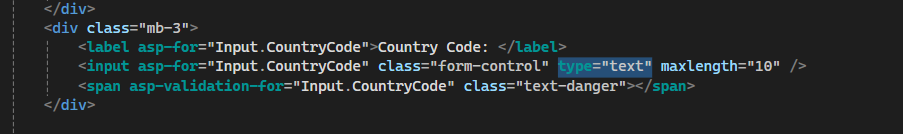

#### Alteração presente em CreateCountry.cshtml.cs

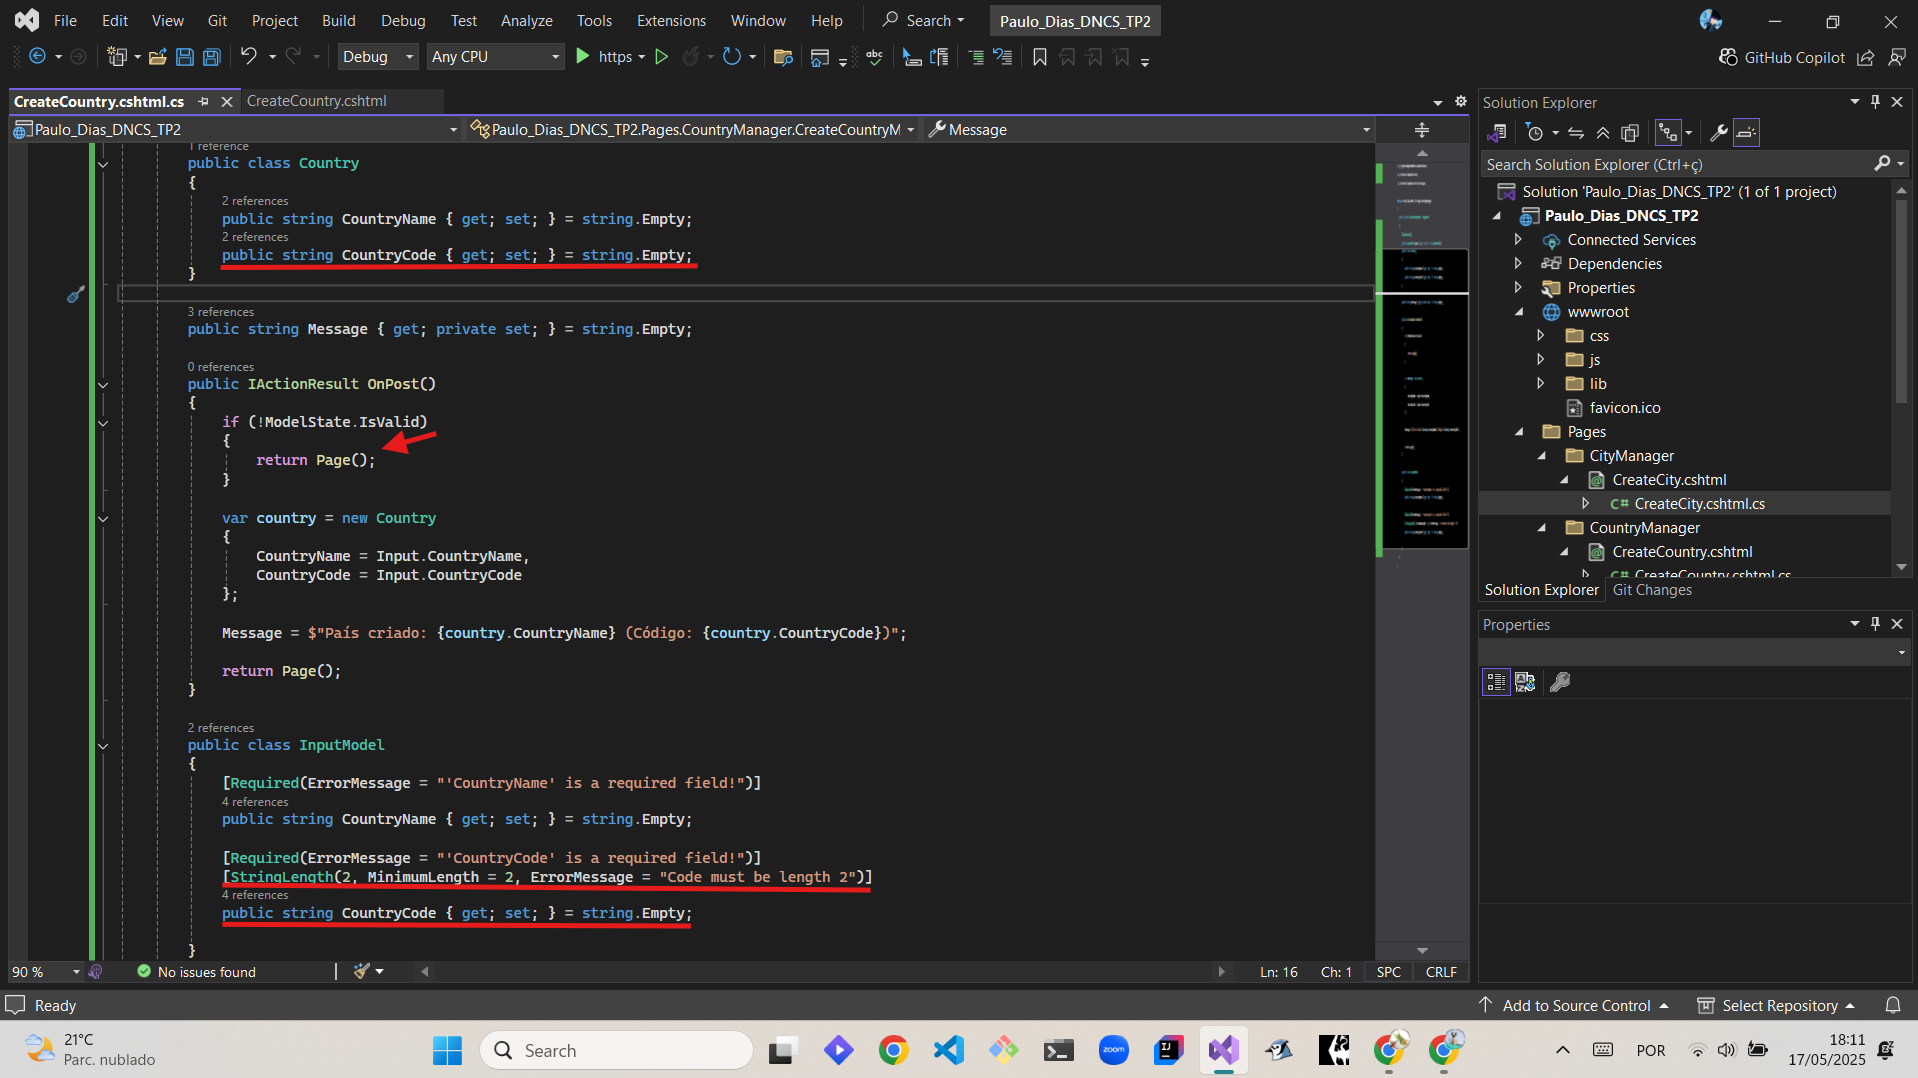

### Exercício 7 - Trabalhando com Vários Registros Simultaneamente

Implemente um formulário para cadastrar múltiplos países em uma única submissão.

Tarefas:

* Crie uma lista List<InputModel> no PageModel com [BindProperty].
* Gere dinamicamente 5 linhas no formulário (use for loop) para preenchimento.
* Exiba os países submetidos após a submissão.

### Resolução do exercício 7

#### Código presente em CreateCountry.cshtml

    @page
    @model Paulo_Dias_DNCS_TP2.Pages.CountryManager.CreateCountryWithListModel
    @section scripts {
    	<partial name="_ValidationScriptsPArtial" />
    }
    
    <div class="col-4">
    	<form method="post">
    		@*
    		<div class="mb-3">
    			<label asp-for="Input.CountryName">Country Name: </label>
    			<input asp-for="Input.CountryName" class="form-control" type="text" maxlength="10" />
    			<span asp-validation-for="Input.CountryName" class="text-danger"></span>
    		</div>
    		<div class="mb-3">
    			<label asp-for="Input.CountryCode">Country Code: </label>
    			<input asp-for="Input.CountryCode" class="form-control" type="text" maxlength="10" />
    			<span asp-validation-for="Input.CountryCode" class="text-danger"></span>
    		</div>
    		*@
    
            @for (int i = 0; i < 5; i++)
            {
                <div class="mb-4">
                    <div class="row">
                        <div class="col-md-6">
                            <div class="d-flex align-items-center mb-1">
                                <label asp-for="Countries[@i].CountryName" class="me-2">Country Name:</label>
                                <input asp-for="Countries[@i].CountryName" class="form-control w-100" type="text" maxlength="10" />
                            </div>
                            <span asp-validation-for="Countries[@i].CountryName" class="text-danger d-block"></span>
                        </div>
    
                        <div class="col-md-6">
                            <div class="d-flex align-items-center mb-1">
                                <label asp-for="Countries[@i].CountryCode" class="me-2">Country Code:</label>
                                <input asp-for="Countries[@i].CountryCode" class="form-control w-100" type="text" maxlength="10" />
                            </div>
                            <span asp-validation-for="Countries[@i].CountryCode" class="text-danger d-block"></span>
                        </div>
                    </div>
                </div>
            }
    		<button type="submit" class="btn btn-primary">Send</button>
    
    	</form>
    </div>
    
    @if (!string.IsNullOrEmpty(Model.Message))
    {
        <p>@Html.Raw(Model.Message)</p>
    }
    


Neste código alterei a estrutura de exibição para que seja feita dentro do loop for. De modo que são renderizados 5 estruturas de exibição. Também apliquei alterações em bootstrap para que seja exibido os campos lado a lado.

#### Código presente em CreateCountry.cshtml.cs

    using System.ComponentModel.DataAnnotations;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CountryManager
    {
        public class CreateCountryWithListModel : PageModel
        {
            [BindProperty]
            public List<InputModel> Countries { get; set; } = new List<InputModel>();
            public class Country
            {
                public string CountryName { get; set; } = string.Empty;
                public string CountryCode { get; set; } = string.Empty;
            }
    
            public string Message { get; private set; } = string.Empty;
    
            public void OnGet()
            {
                for (int i = 0; i < 5; i++)
                {
                    Countries.Add(new InputModel());
                }
            }
    
    
            public IActionResult OnPost()
            {
                if (!ModelState.IsValid)
                {
                    return Page();
                }
    
                var createdCountries = new List<Country>();
    
                foreach (var country in Countries)
                {
                    createdCountries.Add(new Country
                    {
                        CountryName = country.CountryName,
                        CountryCode = country.CountryCode
                    });
                }
    
                Message = "";
    
                for (int i = 0; i < createdCountries.Count; i++)
                {
    
                    Message += $"País criado: {createdCountries[i].CountryName} (Código: {createdCountries[i].CountryCode})<br>";
    
                }
                return Page();
            }
    
            public class InputModel
            {
                [Required(ErrorMessage = "'CountryName' is a required field!")]
                public string CountryName { get; set; } = string.Empty;
    
                [Required(ErrorMessage = "'CountryCode' is a required field!")]
                [StringLength(2, MinimumLength = 2, ErrorMessage = "Code must be length 2")]
                public string CountryCode { get; set; } = string.Empty;
    
            }
        }
    }


No arquivo acima, forma feitas algumas modificações. Como:

* Criação do List com o tipo de input;
* Inclusão do método OnGet() - Para renderizar os "Espaços" da List<InputModel>;
* o método OnPost() passa a criar uma estrutura de lista com cada elemento que foi inserido pelo usuário e os exibe dentro de um loop for.

### Exercício 8 - Roteamento com Parâmetros na URL

Implemente uma página CityDetails.cshtml que recebe o nome da cidade via URL.

Tarefas:

* Configure a diretiva @page "{cityName}".
* Utilize RouteData.Values ou um parâmetro OnGet(string cityName).
* Exiba uma mensagem como "Você está vendo detalhes de: Rio de Janeiro".

### Exercício 9 - Criando URLs com Tag Helpers

Adicione links para cada cidade de uma lista usando tag helpers de roteamento.

Tarefas:

* Crie uma lista List<string> Cities = ["Rio", "São Paulo", "Brasília"].
* Use asp-page e asp-route-cityName para montar os links dinâmicos.
* Verifique se os links direcionam corretamente para CityDetails.

### Resolução do exercício 8 e 9

Para o exercício 9, foi criado um espaço dentro de CreateCity.cshtml ao qual renderiza o código que exibe a mensagem de texto com as cidades padrão em forma de hiperlink. logo ao ser clicado, essa informação é trasportada via backend para a tela CityDetails.cshmtl ao qual renderiza na URL e no corpo do texto o nome da cidade que está sendo visualizada.

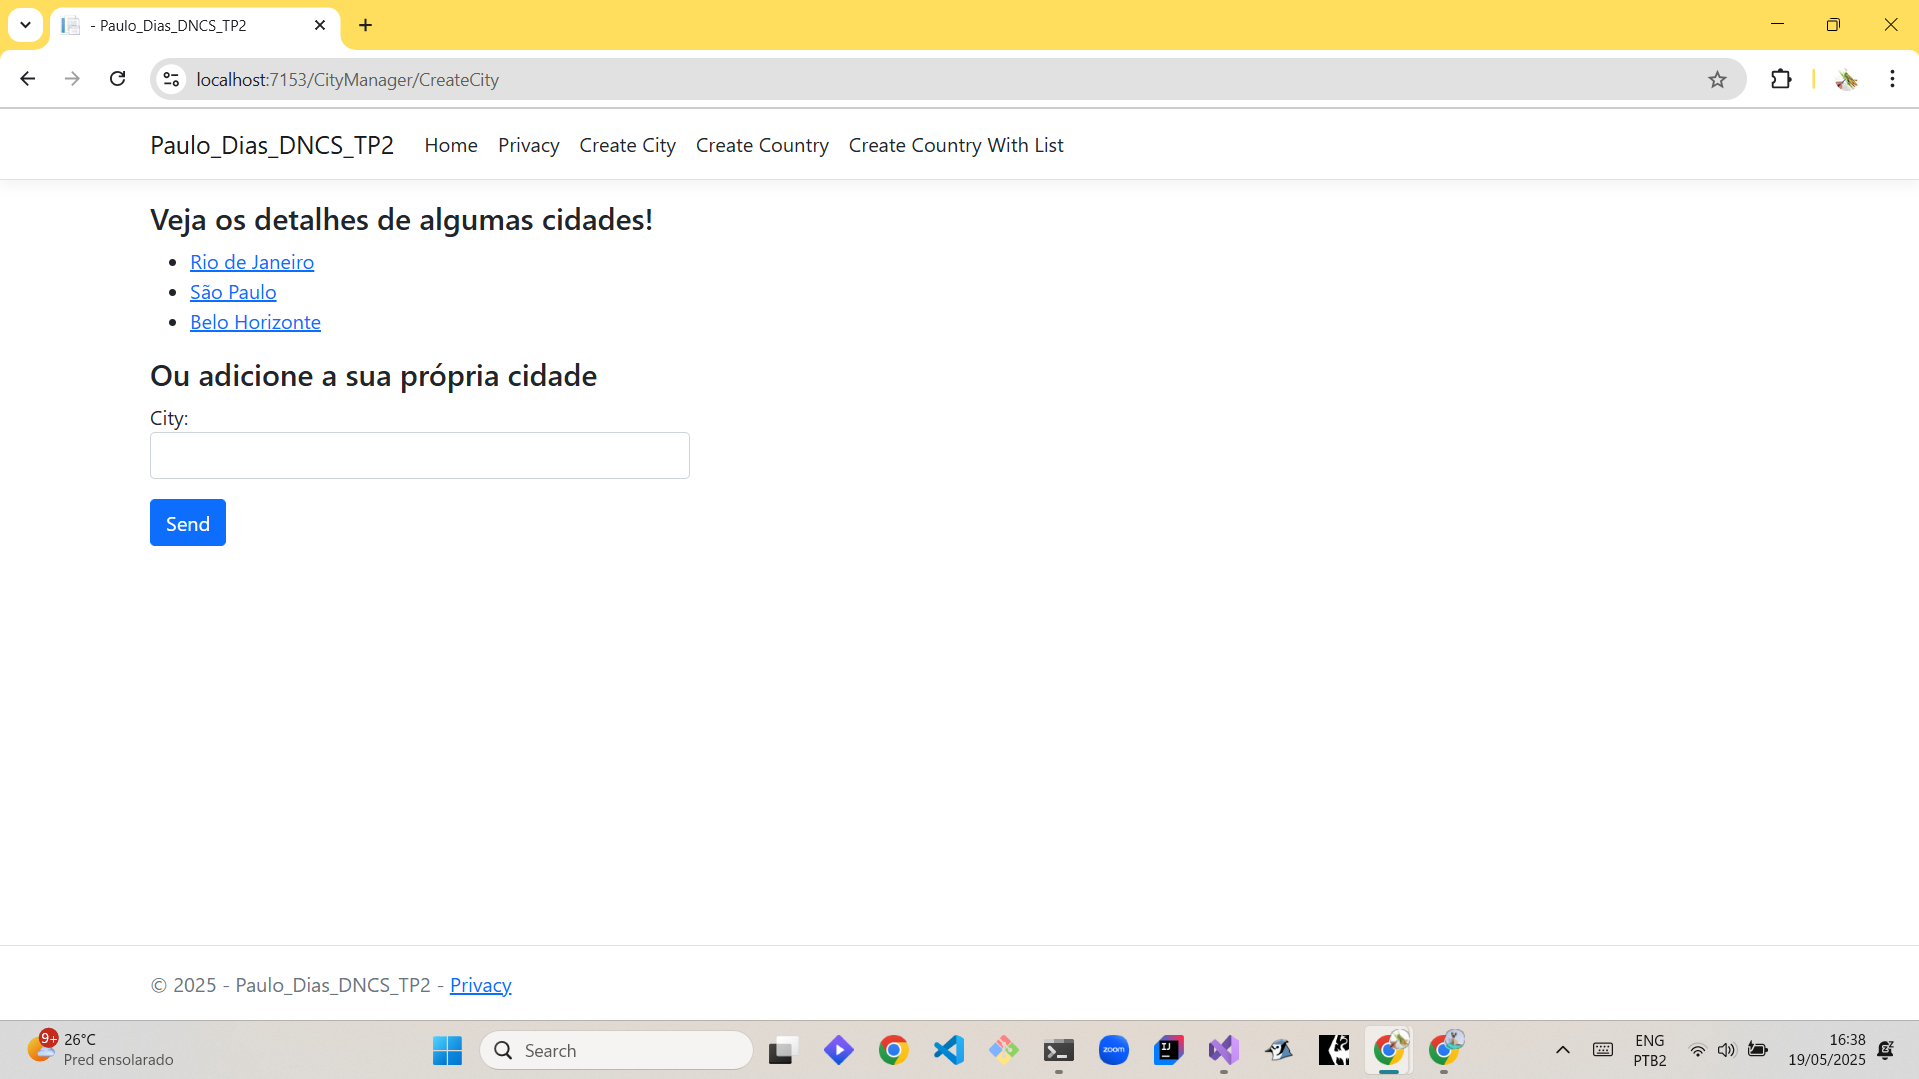

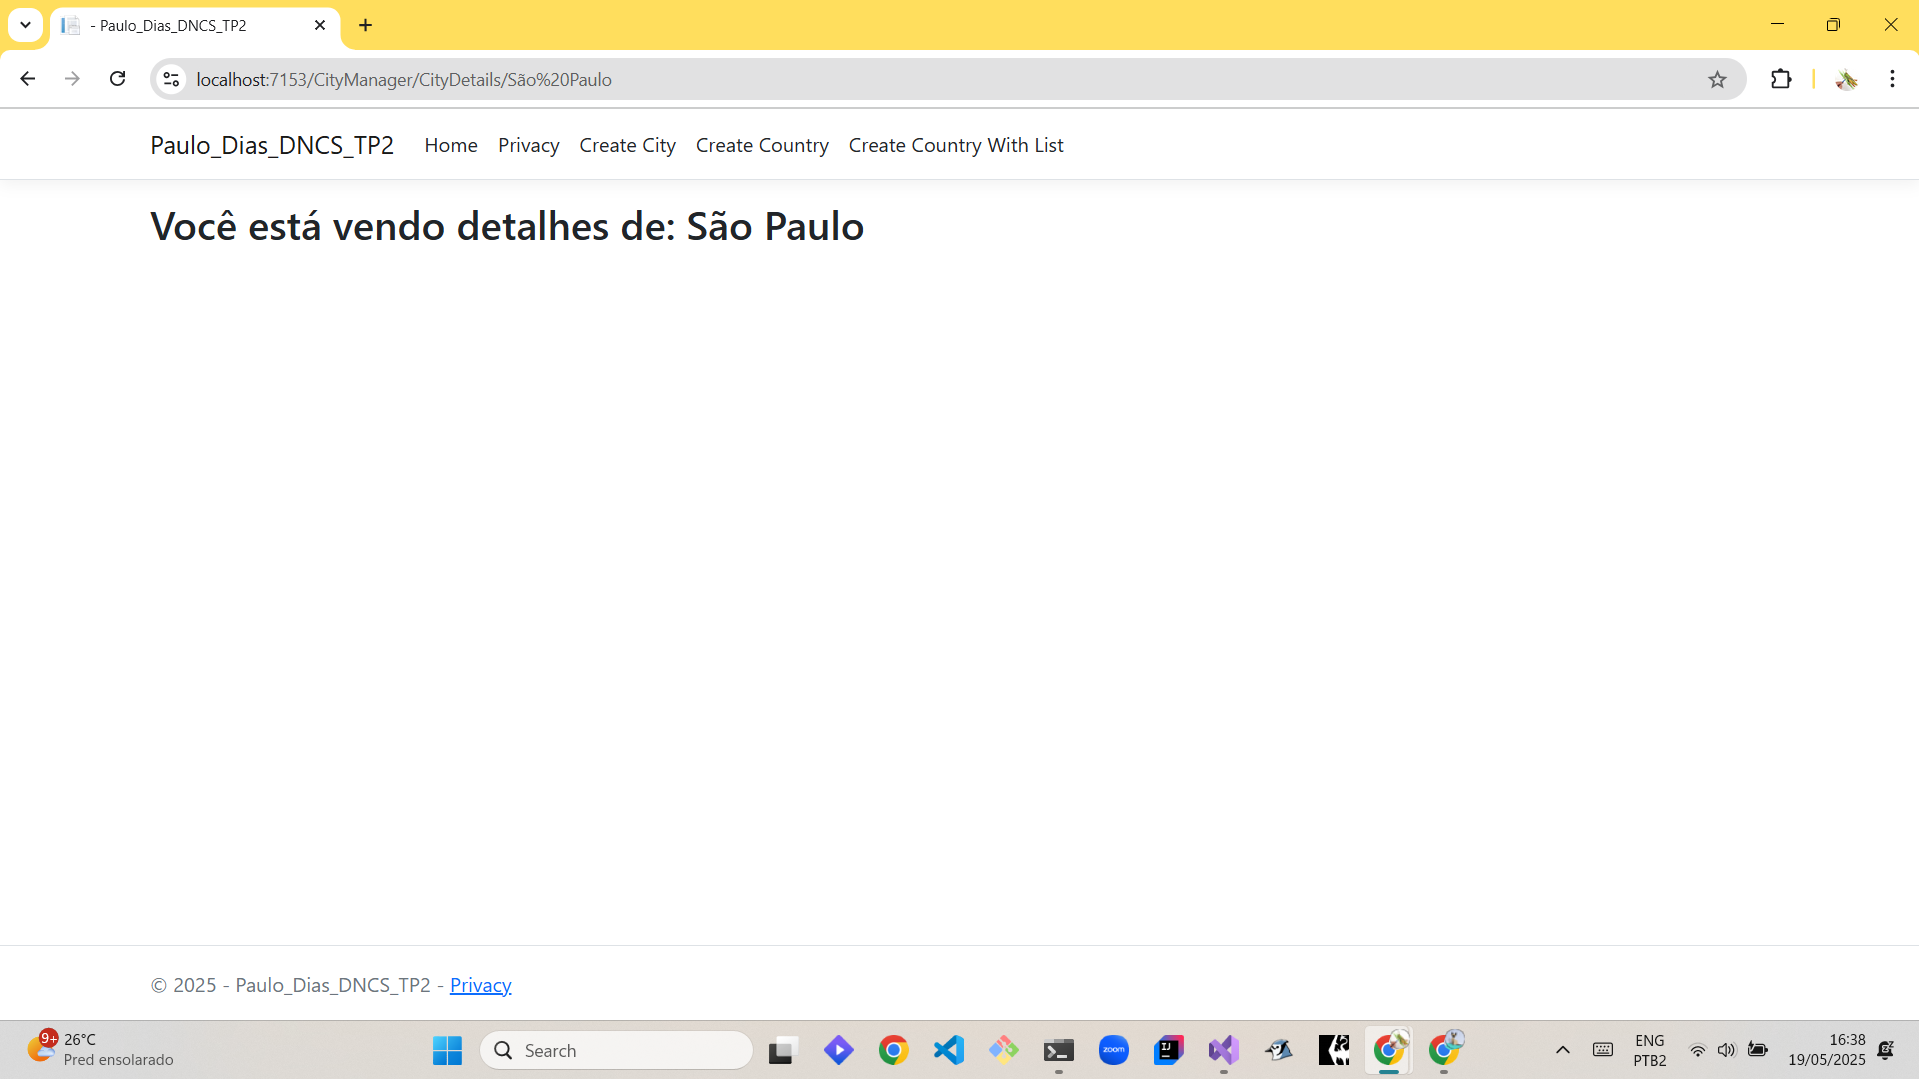

As alterações abaixo foram implementadas:

    Arquivo CreateCity.cshtml
    
    @page
    @model Paulo_Dias_DNCS_TP2.Pages.CityManager.CreateCityModel
    @section scripts {
    	<partial name="_ValidationScriptsPArtial" />
    }
    
    <h4>Veja os detalhes de algumas cidades!</h4>
    
    <ul>
    	@foreach (var city in Model.Cities)
    	{
    		<li>
    			<a asp-page="/CityManager/CityDetails" asp-route-cityName="@city">@city</a>
    		</li>
    	}
    </ul>
    
    <h4>Ou adicione a sua própria cidade</h4>
    ...

    Arquivo CreateCity.cshtml.cs
    using System.ComponentModel.DataAnnotations;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CityManager
    {
        public class CreateCityModel : PageModel
        {
            [BindProperty]
            public InputModel Input { get; set; } = new InputModel();
    
            public string Message { get; private set; } = string.Empty;
    
            public IActionResult OnPost()
            {
                if (!ModelState.IsValid)
                {
                    return Page();
                }
                Message = $"Cidade criada: {Input.CityName}";
                return Page();
            }
    
            public List<string> Cities { get; set; } = new List<string>
            {
                "Rio de Janeiro",
                "São Paulo",
                "Belo Horizonte"
            };
            ...

    Arquivo CityDetails.cshtml
    @page "{cityName}"
    @model Paulo_Dias_DNCS_TP2.Pages.CityManager.CityDetailsModel
    @{
    }
    
    <h2>Você está vendo detalhes de: @Model.CityName</h2>
    


    Arquivo CityDetails.cshtml.cs
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CityManager
    {
        public class CityDetailsModel : PageModel
        {
            public string CityName { get; set; } = string.Empty;
    
            public void OnGet(string cityName)
            {
                CityName = cityName;
            }
        }
    }


### Exercício 10 - Manipulação de Arquivos: Escrita

Crie uma página SaveNote.cshtml que permita ao usuário escrever um texto e salvá-lo em arquivo .txt no wwwroot/files.

Tarefas:

* Use um InputModel com uma propriedade Content.
* Ao submeter, crie um arquivo com nome note-{timestamp}.txt.
* Confirme a escrita e exiba link para download.

### Resolução do exercício 10

##### Código presente no arquivo SaveNote.cshtml

    @page
    @model Paulo_Dias_DNCS_TP2.Pages.NoteManager.SaveNoteModel
    @section Scripts {
        <partial name="_ValidationScriptsPartial" />
    }
    @{
        ViewData["Title"] = "Save Note";
    }
    
    <h2>Salvar Nota</h2>
    
    <form method="post">
        <div class="mb-3">
            <label asp-for="Input.Content" class="form-label">Conteúdo</label>
            <textarea asp-for="Input.Content" class="form-control" rows="5"></textarea>
            <span asp-validation-for="Input.Content" class="text-danger"></span>
        </div>
    
        <button type="submit" class="btn btn-primary">Salvar</button>
    </form>
    
    @if (!string.IsNullOrEmpty(Model.Message))
    {
        <div class="alert alert-success mt-3">
            @Model.Message
            <br />
            <a href="@Model.DownloadLink" target="_blank" download>Baixar arquivo salvo</a>
        </div>
    }


Nesta peça de código temos o a criação do campo de notas, onde o usuário digita o conteúodo do futuro arquivo, que linkado a tag helper asp-for vincula o conteúdo do arquivo cs abaixo. Após o formulário temos a criação de um "Model" que exibe a mensagem de sucesso seguido pelo link de download do arquivo.

##### Código presente no arquivo SaveNote.cshtml.cs

    using System;
    using System.ComponentModel.DataAnnotations;
    using System.IO;
    using Microsoft.AspNetCore.Hosting;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.NoteManager
    {
        public class SaveNoteModel : PageModel
        {
            private readonly IWebHostEnvironment _environment;
    
            public SaveNoteModel(IWebHostEnvironment environment)
            {
                _environment = environment;
            }
    
            [BindProperty]
            public InputModel Input { get; set; } = new InputModel();
    
            public string Message { get; private set; } = string.Empty;
            public string DownloadLink { get; private set; } = string.Empty;
    
            public class InputModel
            {
                [Required(ErrorMessage = "O conteúdo não pode ficar vazio!")]
                public string Content { get; set; } = string.Empty;
            }
    
            public IActionResult OnPost()
            {
                if (!ModelState.IsValid)
                {
                    return Page();
                }
    
                var timestamp = DateTime.Now.ToString("yyyyMMddHHmmss");
                var fileName = $"note-{timestamp}.txt";
    
                var folderPath = Path.Combine(_environment.WebRootPath, "files");
    
                if (!Directory.Exists(folderPath))
                {
                    Directory.CreateDirectory(folderPath);
                }
    
                var filePath = Path.Combine(folderPath, fileName);
    
                System.IO.File.WriteAllText(filePath, Input.Content);
    
                DownloadLink = $"/files/{fileName}";
    
                Message = $"Nota salva com sucesso!";
    
                Input.Content = string.Empty;
    
                return Page();
            }
        }
    }


### Exercício 11 - Manipulação de Arquivos: Leitura

Adicione uma funcionalidade que leia os arquivos .txt do diretório wwwroot/files e exiba seus conteúdos.

Tarefas:

* Liste todos os arquivos da pasta files.
* Mostre links para visualização.
* Abra e exiba o conteúdo do arquivo selecionado.

### Resolução do exercício 11

#### Código presente no arquivo FilesList.cshtml

    @page
    @model Paulo_Dias_DNCS_TP2.Pages.FilesListModel
    
    <h2>Arquivos Salvos</h2>
    
    @if (Model.FileNames.Count == 0)
    {
        <p>Nenhum arquivo encontrado.</p>
    }
    else
    {
        <ul>
            @foreach (var file in Model.FileNames)
            {
                <li>
                    <a asp-page="./FilesList" asp-route-selectedFile="@file">@file</a>
                    &nbsp;|&nbsp;
                    <a href="@(Url.Content("~/files/" + file))" download>Download</a>
                </li>
            }
        </ul>
    }
    
    @if (!string.IsNullOrEmpty(Model.FileContent))
    {
        <h3>Conteúdo do arquivo: @Model.SelectedFile</h3>
        <pre style="background:#f4f4f4; padding:10px;">@Model.FileContent</pre>
    }


#### Código presente no arquivo FilesList.cshtml.cs

    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    using System.IO;
    
    namespace Paulo_Dias_DNCS_TP2.Pages
    {
        public class FilesListModel : PageModel
        {
            private readonly IWebHostEnvironment _environment;
    
            public FilesListModel(IWebHostEnvironment environment)
            {
                _environment = environment;
            }
    
            public List<string> FileNames { get; set; } = new List<string>();
    
            [BindProperty(SupportsGet = true)]
            public string? SelectedFile { get; set; }
    
            public string? FileContent { get; set; }
    
            public void OnGet()
            {
                var folderPath = Path.Combine(_environment.WebRootPath, "files");
    
                if (Directory.Exists(folderPath))
                {
                    FileNames = Directory.GetFiles(folderPath, "*.txt")
                        .Select(Path.GetFileName)
                        .ToList();
                }
    
                if (!string.IsNullOrEmpty(SelectedFile))
                {
                    var filePath = Path.Combine(folderPath, SelectedFile);
                    if (System.IO.File.Exists(filePath))
                    {
                        FileContent = System.IO.File.ReadAllText(filePath);
                    }
                }
            }
        }
    }


### Exercício 12 - Validação Customizada com ModelState

Implemente uma regra onde o nome do país e o código devem começar com a mesma letra.

Tarefas:

* No OnPost, verifique se o primeiro caractere de CountryName é igual ao de CountryCode.
* Caso contrário, adicione erro via ModelState.AddModelError.
* Exiba mensagem de erro próxima ao campo correspondente.

### Resolução do exercício 12

#### Alterações feitas no código do arquivo CreateCountry.cshtml.cs

    using System.ComponentModel.DataAnnotations;
    using Microsoft.AspNetCore.Mvc;
    using Microsoft.AspNetCore.Mvc.RazorPages;
    
    namespace Paulo_Dias_DNCS_TP2.Pages.CountryManager
    {
        public class CreateCountryModel : PageModel
        {
            [BindProperty]
            public InputModel Input { get; set; } = new InputModel();
            public class Country
            {
                public string CountryName { get; set; } = string.Empty;
                public string CountryCode { get; set; } = string.Empty;
            }
    
            public string Message { get; private set; } = string.Empty;
    
            public IActionResult OnPost()
            {
                if (!ModelState.IsValid)
                {
                    return Page();
                }
    
                if (!string.IsNullOrEmpty(Input.CountryName) && !string.IsNullOrEmpty(Input.CountryCode))
                {
                    char firstCharCountryName = char.ToUpper(Input.CountryName[0]);
                    char firstCharCountryCode = char.ToUpper(Input.CountryCode[0]);
    
                    if (firstCharCountryName != firstCharCountryCode)
                    {
                        ModelState.AddModelError("Input.CountryCode", "O código do país deve começar com a mesma letra do nome do país.");
                        return Page();
                    }
                }

                ...

Aqui foi adicionado essa peça de código 

    if (!string.IsNullOrEmpty(Input.CountryName) && !string.IsNullOrEmpty(Input.CountryCode))
                {
                    char firstCharCountryName = char.ToUpper(Input.CountryName[0]);
                    char firstCharCountryCode = char.ToUpper(Input.CountryCode[0]);
    
                    if (firstCharCountryName != firstCharCountryCode)
                    {
                        ModelState.AddModelError("Input.CountryCode", "O código do país deve começar com a mesma letra do nome do país.");
                        return Page();
                    }
                }

Onde ela busca a primeira letra de cada campo e as compara, se diferentes, lança o erro.